In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
data.dropna(inplace = True)

In [5]:
print(data)

            FedFunds  Unemployment  HousingStarts  Inflation
1959-01-01      2.48           6.0         1657.0     29.010
1959-02-01      2.43           5.9         1667.0     29.000
1959-03-01      2.80           5.6         1620.0     28.970
1959-04-01      2.96           5.2         1590.0     28.980
1959-05-01      2.90           5.1         1498.0     29.040
...              ...           ...            ...        ...
2023-07-01      5.12           3.5         1451.0    304.348
2023-08-01      5.33           3.8         1305.0    306.269
2023-09-01      5.33           3.8         1356.0    307.481
2023-10-01      5.33           3.8         1359.0    307.619
2023-11-01      5.33           3.7         1560.0    307.917

[779 rows x 4 columns]


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [12]:
split_1 = int(len(data) * 0.6)
split_2 = int(len(data) * 0.9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [13]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [14]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [15]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph fro your model

In [16]:
import matplotlib.pyplot as plt

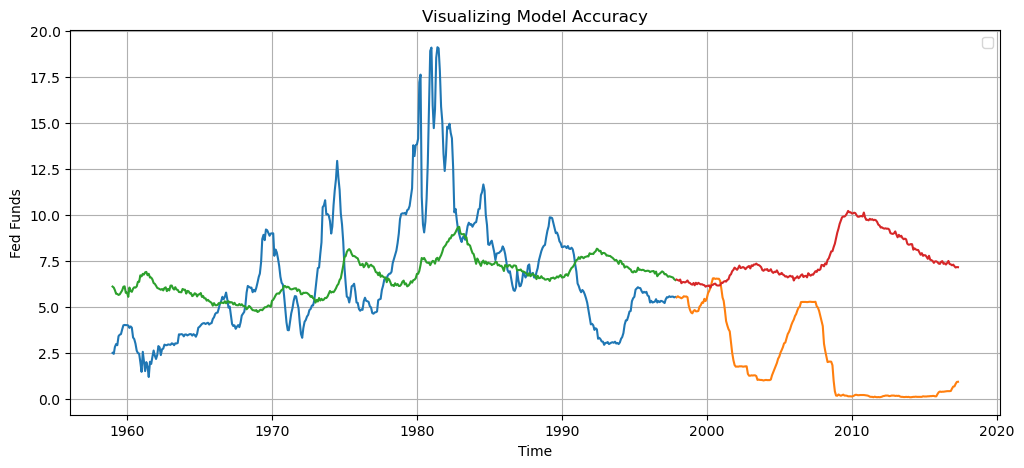

In [17]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
in_mse_1 = mean_squared_error(y_in, model1.predict(X_in))
out_mse_1 = mean_squared_error(y_out, model1.predict(X_out))

In [20]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168643
Outsample MSE :  40.360827835668495


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
degrees = 2

In [23]:
max_degrees = 3

DEGREES : 1


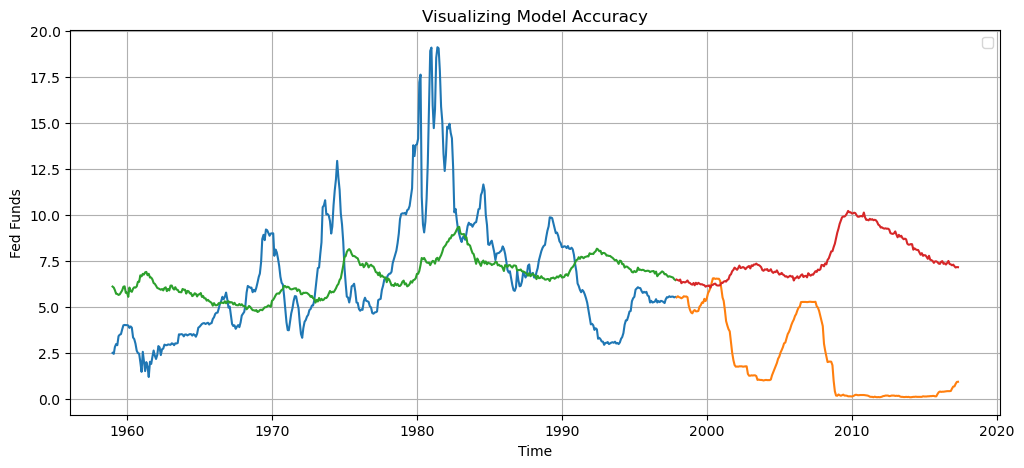

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783566696
_______________________
DEGREES : 2


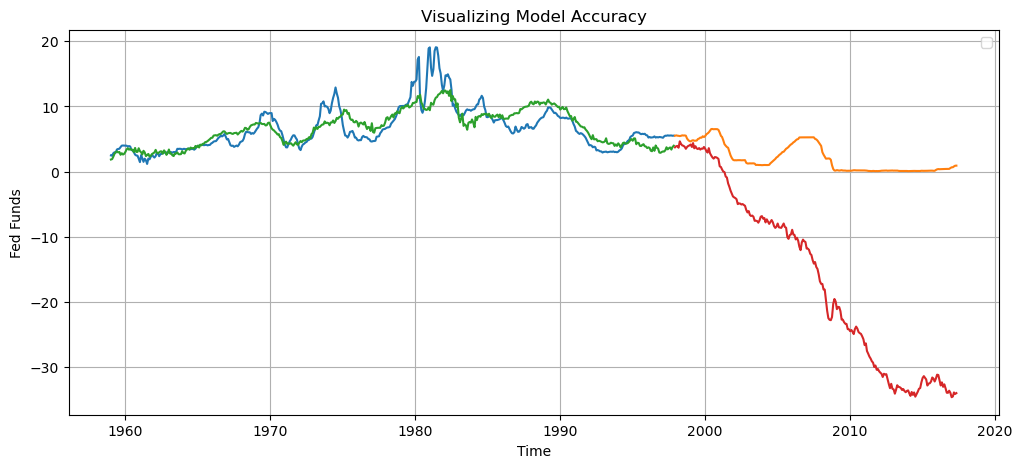

Insample MSE :  3.863477139276067
Outsample MSE :  481.44650990363215
_______________________
DEGREES : 3


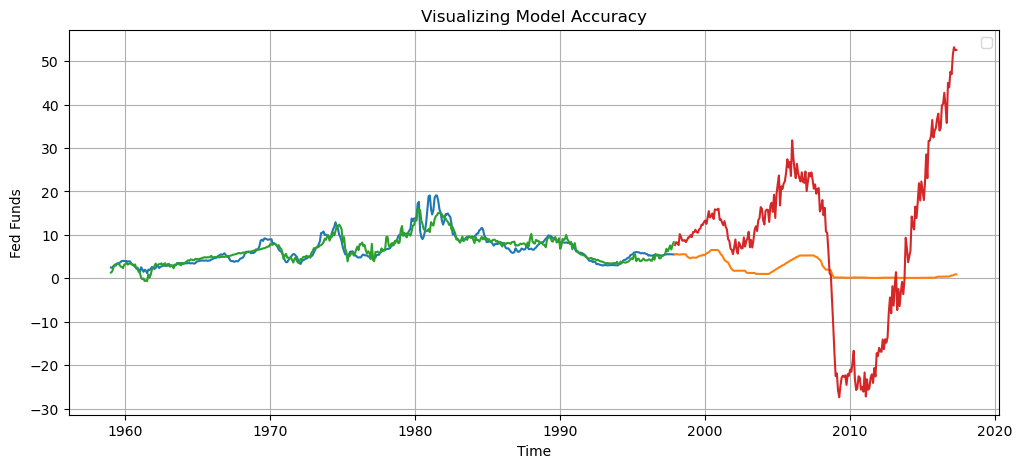

Insample MSE :  1.8723636271946138
Outsample MSE :  371.7661890061894
_______________________


In [24]:
for degrees in range(1,1+max_degrees):
    print("DEGREES :", degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)
    
    #Q3
    model1 = sm.OLS(y_in, X_in_poly).fit()
    
    #Q4
    plt.figure(figsize = (12,5))
    
    in_preds = model1.predict(X_in_poly)
    in_preds = pd.DataFrame(in_preds, index = y_in.index)
    out_preds = model1.predict(X_out_poly)
    out_preds = pd.DataFrame(out_preds, index = y_out.index)
    ###
    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(in_preds)
    plt.plot(out_preds)
    #plt.plot(model1.predict(X_in_poly))
    #plt.plot(model1.predict(X_out_poly))
    ###

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend([])
    plt.grid()
    plt.show()
    
    #Q5
    
    in_mse_1 = mean_squared_error(y_in, model1.predict(X_in_poly))
    out_mse_1 = mean_squared_error(y_out, model1.predict(X_out_poly))
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)
    print("_______________________")

# 7.) State your observations :

The model overfits the data. In-sample MSE is increasing while out-of-sample is decreasing. Variance for the total model is increasing.